# MLFlow Notebook 
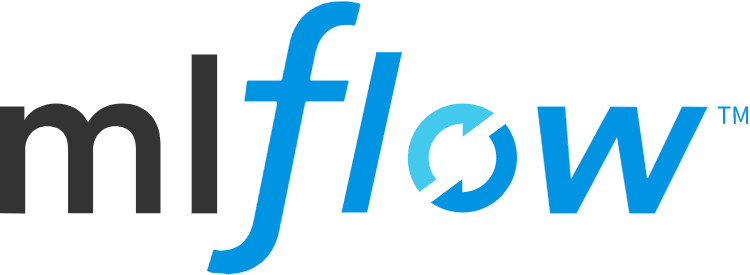

In [1]:
#install MLflow
!pip install mlflow  pytorch_lightning --quiet 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 5.5 MB/s eta 0

In [2]:
import mlflow

In [3]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &")# run tracking UI in the background

In [4]:
#NEW Proxy Solution using Colabs internal proxy (thanks to Florian Glauner)

from google.colab.output import eval_js

print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://dpzd8y8bm4d-496ff2e9c6d22116-5000-colab.googleusercontent.com/


## MNIST Dummy Problem



In [5]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output


def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        mlflow.log_metric("loss", loss)
        loss.backward()
        optimizer.step()
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

In [6]:
 device = torch.device("cuda") #change instance to GPU for faster experiments


In [15]:
mlflow.end_run()

In [16]:
#create new Experiment
e_id=mlflow.create_experiment('second experiment')

In [18]:
mlflow.set_experiment('second experiment')

<Experiment: artifact_location='file:///content/mlruns/378899588186677955', creation_time=1682663724681, experiment_id='378899588186677955', last_update_time=1682663724681, lifecycle_stage='active', name='second experiment', tags={}>

In [19]:
#mlflow.end_run()
mlflow.start_run()

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,32)
test_loader = torch.utils.data.DataLoader(dataset2, 32)

model = Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=0.01)

mlflow.log_param("lr", 0.01)
mlflow.log_param("batch_size", 32)
mlflow.log_param("epochs", 10)

scheduler = StepLR(optimizer, step_size=1, gamma=0.9)
for epoch in range(1, 2):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)
        scheduler.step()

mlflow.pytorch.log_model(
        model,
        artifact_path="myModel",
        registered_model_name="first_model",
    )

mlflow.end_run()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.280208
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.599142


2023/04/28 06:36:28 WARNING mlflow.utils.requirements_utils: Found torch version (2.0.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.0.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/04/28 06:36:32 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmps2raamjg/model/data, flavor: pytorch), fall back to return ['torch==2.0.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.
Successfully registered model 'first_model'.
2023/04/28 06:36:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: first_model, version 1
Created version '1' of model 'first_model'.


## Exercise 1: Model Registry
* Add new MLFlow Experiments and track the runs -> see https://mlflow.org/docs/latest/tracking.html#pytorch
  * Run several experiments changing some hyperparamters (and track them)
  * save models of the runs un MLFlow model registry -> see https://mlflow.org/docs/latest/model-registry.html 

## Exercise 2: Model Deployment
* deploy one of the models above using a rest API -> see https://mlflow.org/docs/latest/quickstart.html#saving-and-serving-models
* write an inference code, handing MNIST test images to this API

In [22]:
from pprint import pprint
from mlflow import MlflowClient


client = MlflowClient()
for rm in client.search_registered_models():
    pprint(dict(rm), indent=4)

{   'aliases': {},
    'creation_timestamp': 1682663792173,
    'description': None,
    'last_updated_timestamp': 1682663792179,
    'latest_versions': [   <ModelVersion: aliases=[], creation_timestamp=1682663792179, current_stage='None', description=None, last_updated_timestamp=1682663792179, name='first_model', run_id='1be61a28c74f458c94ed7a0b253956f1', run_link=None, source='file:///content/mlruns/378899588186677955/1be61a28c74f458c94ed7a0b253956f1/artifacts/myModel', status='READY', status_message=None, tags={}, user_id=None, version=1>],
    'name': 'first_model',
    'tags': {}}


In [23]:
print(eval_js("google.colab.kernel.proxyPort(1234)"))

https://4eq22br2ita-496ff2e9c6d22116-1234-colab.googleusercontent.com/


In [29]:
!mlflow models serve -m runs:/1be61a28c74f458c94ed7a0b253956f1/myModel --port 1234

2023/04/28 06:45:16 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'
Traceback (most recent call last):
  File "/usr/local/bin/mlflow", line 8, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 760, in invoke
    return __callback(*args, **kwargs)


In [34]:
!curl https://pyenv.run | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   270  100   270    0     0    594      0 --:--:-- --:--:-- --:--:--   594
Cloning into '/root/.pyenv'...
remote: Enumerating objects: 1115, done.
remote: Counting objects: 100% (1115/1115), done.
remote: Compressing objects: 100% (474/474), done.
remote: Total 1115 (delta 663), reused 799 (delta 511), pack-reused 0
Receiving objects: 100% (1115/1115), 548.79 KiB | 3.41 MiB/s, done.
Resolving deltas: 100% (663/663), done.
Cloning into '/root/.pyenv/plugins/pyenv-doctor'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 38.70 KiB | 3.87 MiB/s, done.
Cloning into '/root/.pyenv/plugins/pyenv-update'...
remote: Enumerating objects: 10, done.
remote: Coun

In [10]:
!export PYENV_ROOT="/root/.pyenv"
!export PATH="$PYENV_ROOT/bin:$PATH"
!eval "$(pyenv init -)"

/bin/bash: pyenv: command not found


In [12]:
%env PYENV_ROOT="/root/.pyenv"


env: PYENV_ROOT="/root/.pyenv"


In [15]:
!echo $PATH

"$PYENV_ROOT/bin:$PATH"


In [14]:
%env PATH="$PYENV_ROOT/bin:$PATH"

env: PATH="$PYENV_ROOT/bin:$PATH"
